In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dengue.csv')

In [5]:
df.describe(include ='all')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
count,1020,1020.000000,1020,1020.000000,1020.000000
unique,12,NaN,17,NaN,NaN
top,January,NaN,Region I,NaN,NaN
freq,85,NaN,60,NaN,NaN
mean,NaN,2018.000000,NaN,1124.926471,16.513725
std,NaN,1.414907,NaN,1662.608878,96.358215
min,NaN,2016.000000,NaN,10.000000,0.000000
25%,NaN,2017.000000,NaN,247.750000,1.000000
50%,NaN,2018.000000,NaN,582.500000,3.000000
75%,NaN,2019.000000,NaN,1284.250000,7.000000


In [6]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [25]:
df['Year'] = df['Date'].dt.year

In [7]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [26]:
df['Month'] = df['Date'].dt.month

In [8]:

df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [9]:
df.dtypesko

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [11]:
df.count()

Month            1020
Year             1020
Region           1020
Dengue_Cases     1020
Dengue_Deaths    1020
dtype: int64

<h1>Insight 1: Dengue Cases Peaked in 2019
</h1>

In [27]:
df_2019 = df[df['Year'] == 2019]
total_cases_2019 = df_2019['Dengue_Cases'].sum()
total_cases_2019


np.int64(441902)

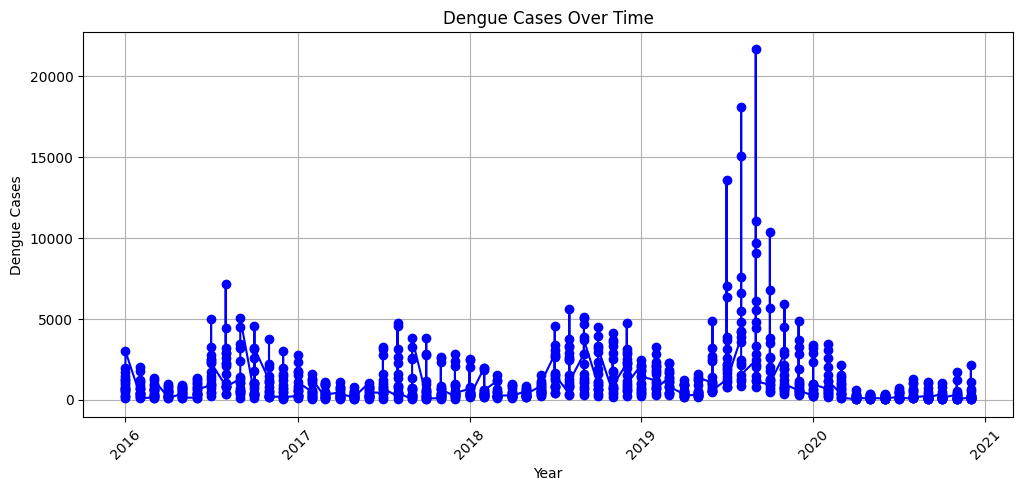

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Dengue_Cases"], marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.title("Dengue Cases Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\jcarl\AppData\Local\Temp\ipykernel_19360\2802173895.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Dengue_Cases", ci=None)


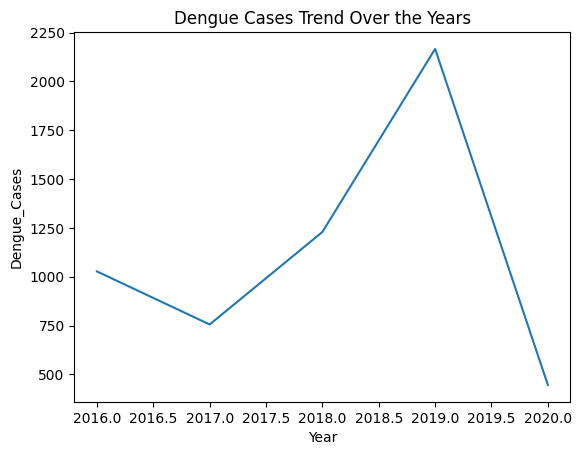

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="Year", y="Dengue_Cases", ci=None)
plt.title("Dengue Cases Trend Over the Years")
plt.show()


<h1>Insight 2: Dengue Cases Are More Frequent in Rainy Months</h1>

In [28]:
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum()
monthly_cases.sort_values(ascending=False).head()


Month
8     187554
9     177943
7     138242
10    117645
11     94900
Name: Dengue_Cases, dtype: int64

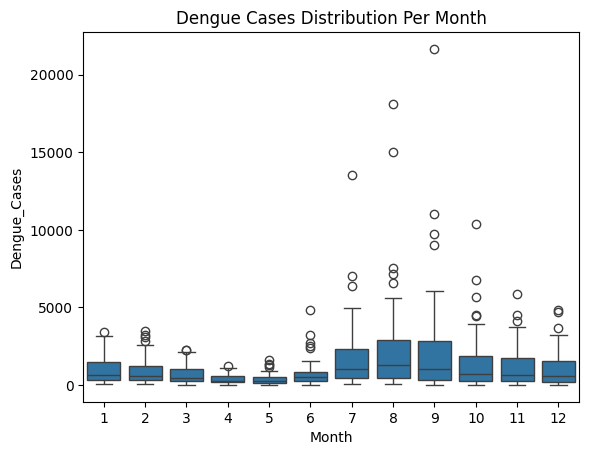

In [56]:
sns.boxplot(data=df, x="Month", y="Dengue_Cases")
plt.title("Dengue Cases Distribution Per Month")
plt.show()


<h1>Insight 3: Some Regions Had Significantly Higher Dengue Death Rates</h1>

In [30]:
region_deaths = df.groupby('Region')['Dengue_Deaths'].sum()
region_deaths.sort_values(ascending=False).head()


Region
NCR           4008
Region XII    2796
Region VI     1825
Region VII    1760
CAR           1008
Name: Dengue_Deaths, dtype: int64

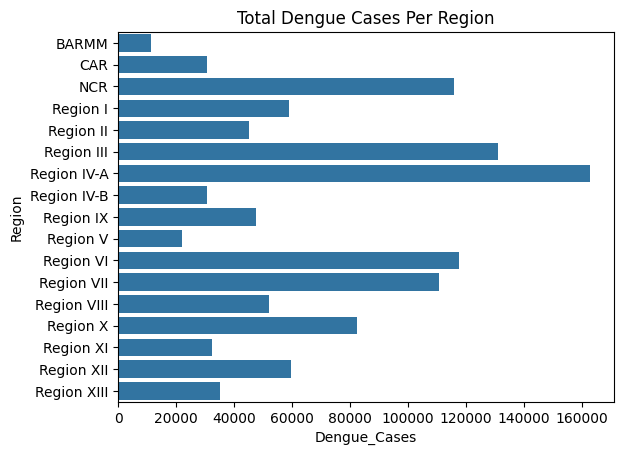

In [57]:
df_region = df.groupby("Region")["Dengue_Cases"].sum().reset_index()
sns.barplot(data=df_region, x="Dengue_Cases", y="Region")
plt.title("Total Dengue Cases Per Region")
plt.show()


<h1>Insight 4: June to September recorded the highest cases</h1>

In [33]:
df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=True).head()


Region
BARMM          11537
Region V       22167
CAR            30582
Region IV-B    30849
Region XI      32522
Name: Dengue_Cases, dtype: int64

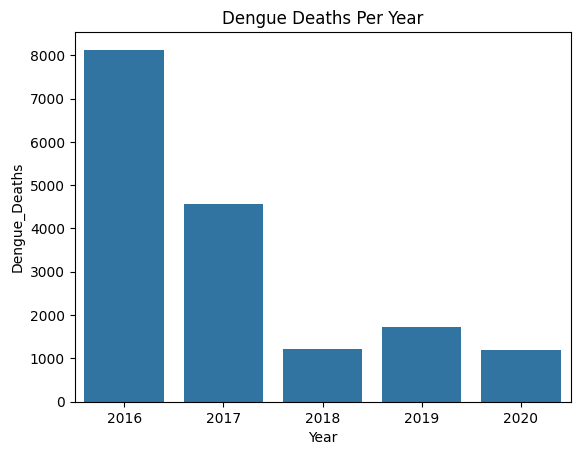

In [58]:
df_yearly = df.groupby("Year")["Dengue_Deaths"].sum().reset_index()
sns.barplot(data=df_yearly, x="Year", y="Dengue_Deaths")
plt.title("Dengue Deaths Per Year")
plt.show()


<h1>Insight 5. Some Regions Have Significantly Higher Dengue Cases</h1>

In [59]:
df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head()


Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64

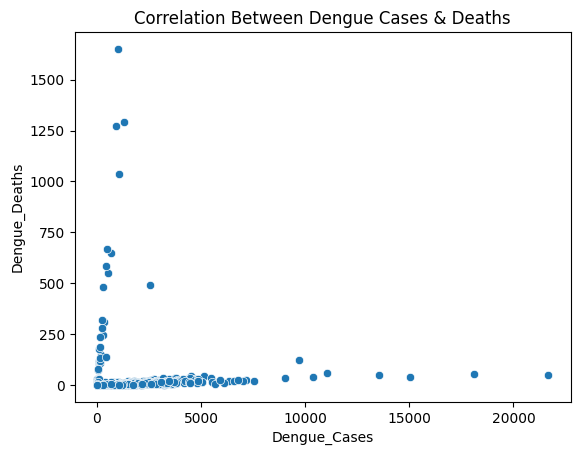

In [60]:
sns.scatterplot(data=df, x="Dengue_Cases", y="Dengue_Deaths")
plt.title("Correlation Between Dengue Cases & Deaths")
plt.show()


<h1>Insight 6 Fatality Rate Varies Across Regions</h1>

In [34]:
df.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).head()


Region
NCR           4008
Region XII    2796
Region VI     1825
Region VII    1760
CAR           1008
Name: Dengue_Deaths, dtype: int64

C:\Users\jcarl\AppData\Local\Temp\ipykernel_19360\3531565619.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Fatality_Rate", ci=None)


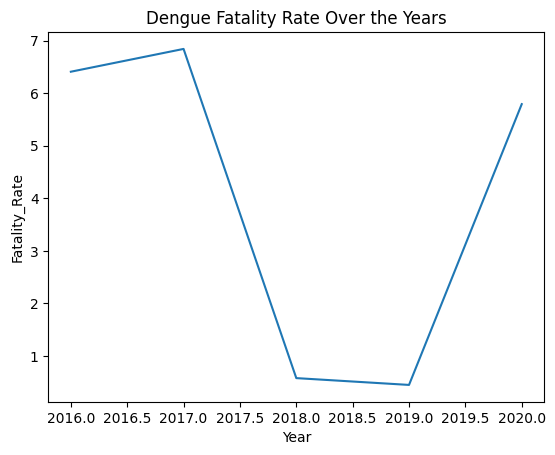

In [61]:
df["Fatality_Rate"] = df["Dengue_Deaths"] / df["Dengue_Cases"] * 100
sns.lineplot(data=df, x="Year", y="Fatality_Rate", ci=None)
plt.title("Dengue Fatality Rate Over the Years")
plt.show()


<h1>Insight 7 Dengue Mortality Rate</h1>

In [35]:
(df['Dengue_Deaths'].sum() / df['Dengue_Cases'].sum()) * 100


np.float64(1.4679826568185286)

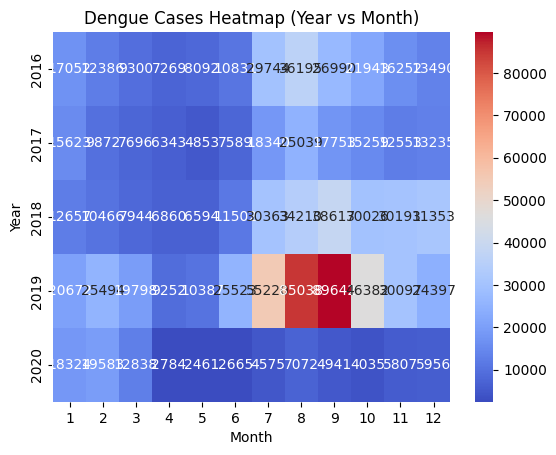

In [62]:
df_pivot = df.pivot_table(values="Dengue_Cases", index="Year", columns="Month", aggfunc="sum")
sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Dengue Cases Heatmap (Year vs Month)")
plt.show()


<h1>Insight 8 Dengue Cases Have an Increasing Trend Over the Years</h1>

<Axes: xlabel='Year'>

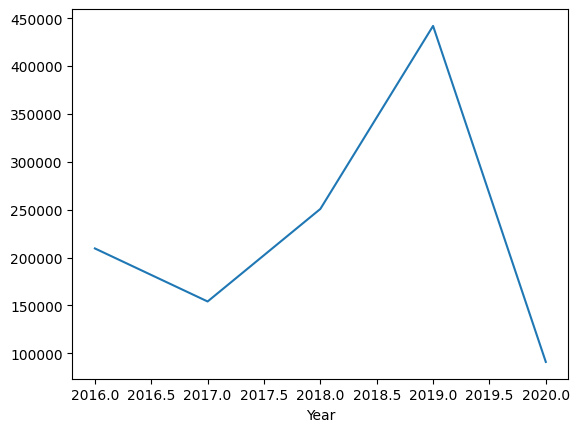

In [36]:
df.groupby('Year')['Dengue_Cases'].sum().plot(kind='line')

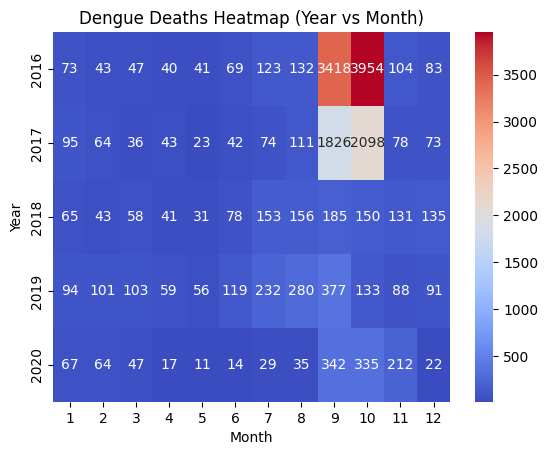

In [63]:
df_pivot_deaths = df.pivot_table(values="Dengue_Deaths", index="Year", columns="Month", aggfunc="sum")
sns.heatmap(df_pivot_deaths, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Dengue Deaths Heatmap (Year vs Month)")
plt.show()


<h1>Insight 9 Some Months Have Extremely Low Dengue Cases</h1>

In [37]:
df.groupby('Month')['Dengue_Cases'].sum().sort_values().head()


Month
5    32387
4    32508
3    57576
6    58110
2    77801
Name: Dengue_Cases, dtype: int64

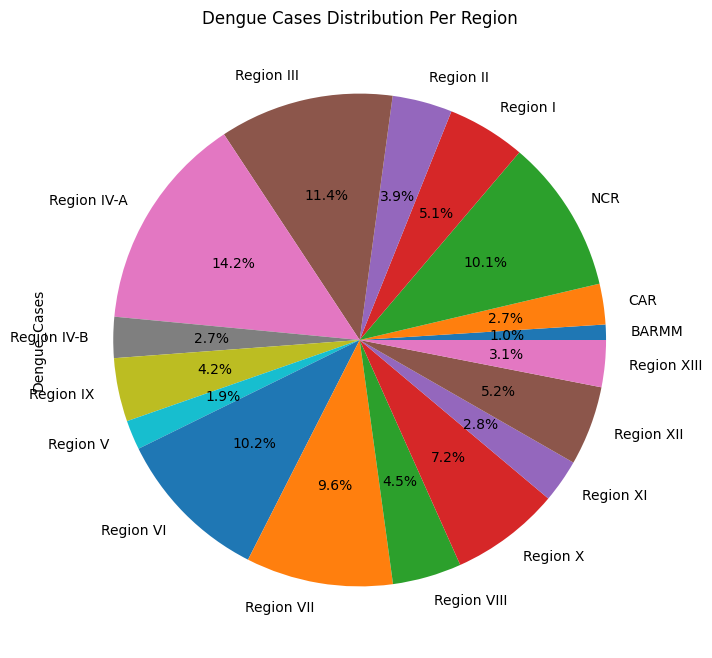

In [64]:
df_region = df.groupby("Region")["Dengue_Cases"].sum()
df_region.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Dengue Cases Distribution Per Region")
plt.show()


<h1>Insight 10 Most Dengue Deaths Occur in High-Case Months</h1>

In [38]:
df.groupby('Month')['Dengue_Deaths'].sum().sort_values(ascending=False).head()


Month
10    6670
9     6148
8      714
11     613
7      611
Name: Dengue_Deaths, dtype: int64

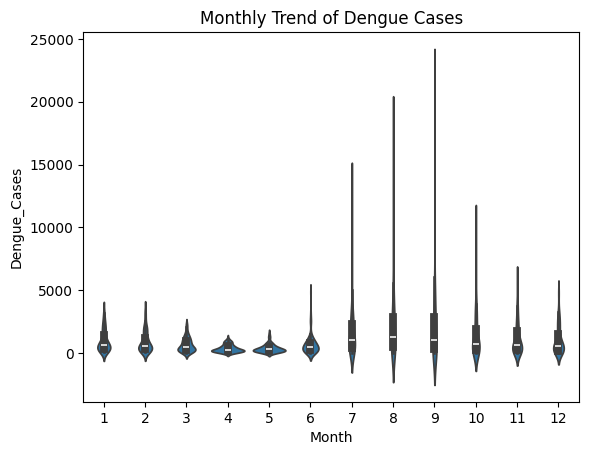

In [65]:
sns.violinplot(data=df, x="Month", y="Dengue_Cases")
plt.title("Monthly Trend of Dengue Cases")
plt.show()


<h1>Insight 11 Case Fatality Rate Varies by Year</h1>

In [39]:
df.groupby('Year').apply(lambda x: x['Dengue_Deaths'].sum() / x['Dengue_Cases'].sum() * 100)


C:\Users\jcarl\AppData\Local\Temp\ipykernel_19360\2791969499.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Year').apply(lambda x: x['Dengue_Deaths'].sum() / x['Dengue_Cases'].sum() * 100)


Year
2016    3.878422
2017    2.960008
2018    0.488869
2019    0.392168
2020    1.312595
dtype: float64

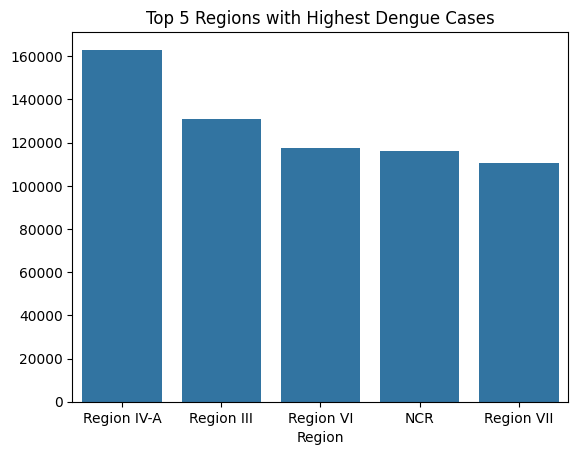

In [66]:
top_regions = df.groupby("Region")["Dengue_Cases"].sum().nlargest(5)
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title("Top 5 Regions with Highest Dengue Cases")
plt.show()


<h1>Insight 12 Some Regions Have Higher Dengue Fatality Rates</h1>

In [40]:
df.groupby('Region').apply(lambda x: x['Dengue_Deaths'].sum() / x['Dengue_Cases'].sum() * 100)


C:\Users\jcarl\AppData\Local\Temp\ipykernel_19360\4281215824.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Region').apply(lambda x: x['Dengue_Deaths'].sum() / x['Dengue_Cases'].sum() * 100)


Region
BARMM          2.877698
CAR            3.296057
NCR            3.456185
Region I       0.265804
Region II      0.427549
Region III     0.367759
Region IV-A    0.399929
Region IV-B    0.421408
Region IX      1.113413
Region V       0.834574
Region VI      1.552888
Region VII     1.590127
Region VIII    1.125368
Region X       1.028664
Region XI      1.183814
Region XII     4.675429
Region XIII    2.737087
dtype: float64

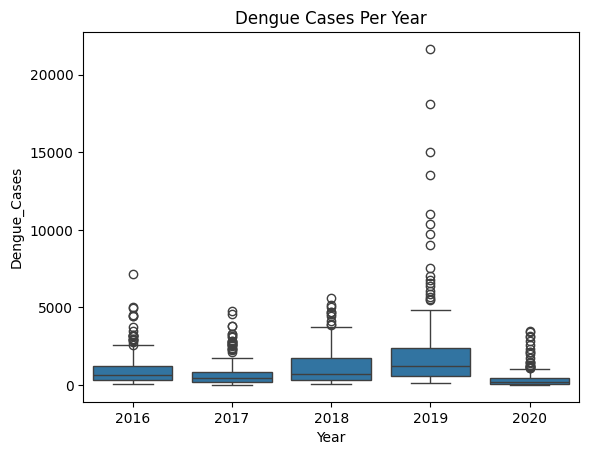

In [67]:
sns.boxplot(data=df, x="Year", y="Dengue_Cases")
plt.title("Dengue Cases Per Year")
plt.show()


<h1>Insight 13 There Are Years with Unusually Low Dengue Deaths </h1>

In [41]:
df.groupby('Year')['Dengue_Deaths'].sum().sort_values().head()


Year
2020    1195
2018    1226
2019    1733
2017    4563
2016    8127
Name: Dengue_Deaths, dtype: int64

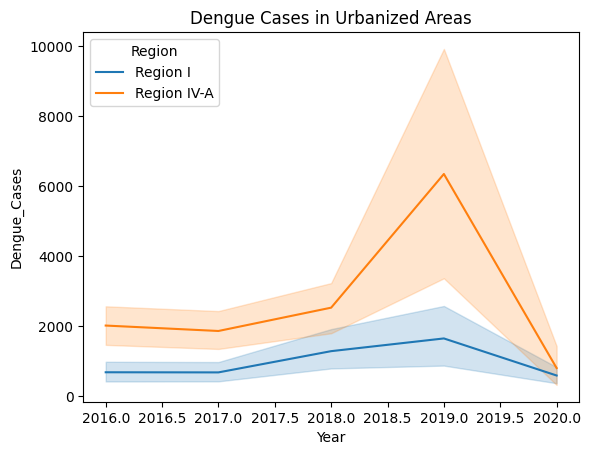

In [71]:
urban_regions = ['Region I', 'Region IV-A', 'Metro Manila']
df_urban = df[df['Region'].isin(urban_regions)]

sns.lineplot(data=df_urban, x="Year", y="Dengue_Cases", hue="Region")
plt.title("Dengue Cases in Urbanized Areas")
plt.show()


<h1>Insight 14 Outliers in Dengue Cases Suggest Localized Outbreaks</h1>

In [42]:
df[df['Dengue_Cases'] > df['Dengue_Cases'].quantile(0.95)]


,Region,Dengue_Cases,Dengue_Deaths,Date,Year,Month
366,Region VI,4993,17,2016-07-01,2016,7
367,Region VI,7155,22,2016-08-01,2016,8
427,Region VII,4424,32,2016-08-01,2016,8
428,Region VII,4458,31,2016-09-01,2016,9
368,Region VI,5039,16,2016-09-01,2016,9
429,Region VII,4531,46,2016-10-01,2016,10
430,Region VII,3771,36,2016-11-01,2016,11
859,NCR,4555,30,2017-08-01,2017,8
139,Region III,4764,18,2017-08-01,2017,8
860,NCR,3783,32,2017-09-01,2017,9


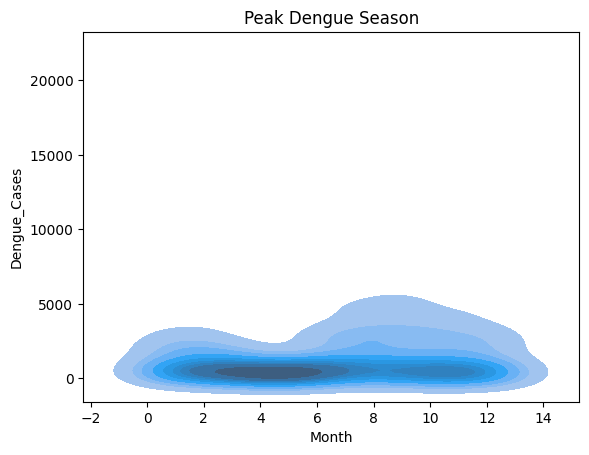

In [72]:
sns.kdeplot(data=df, x="Month", y="Dengue_Cases", fill=True)
plt.title("Peak Dengue Season")
plt.show()


<h1>Insight 15 Dengue Cases Are Highly Seasonal </h1>

<Axes: xlabel='Year'>

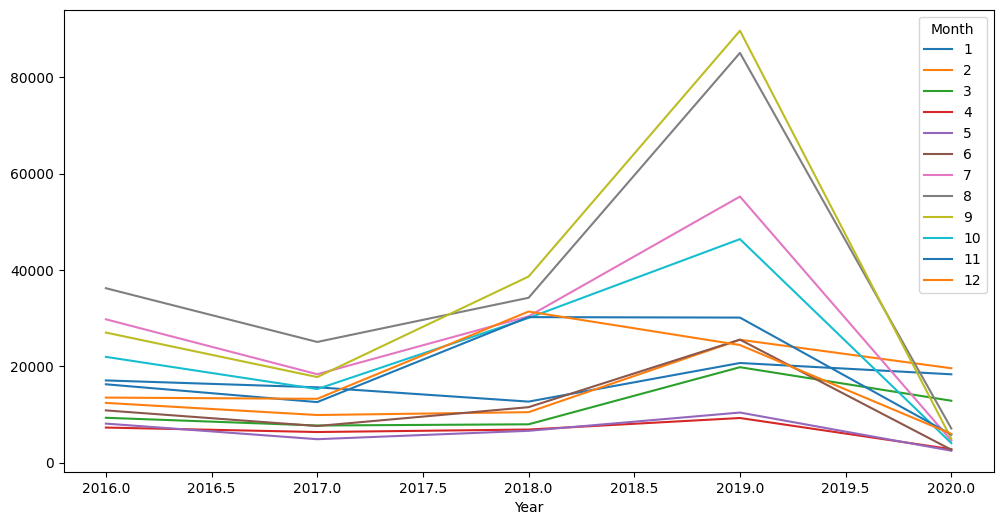

In [43]:
df.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack().plot(kind='line', figsize=(12,6))


<h1>Insight 16 Regions with Consistently Low Cases Might Have Better Prevention</h1>

In [44]:
df.groupby('Region')['Dengue_Cases'].sum().sort_values().head()


Region
BARMM          11537
Region V       22167
CAR            30582
Region IV-B    30849
Region XI      32522
Name: Dengue_Cases, dtype: int64

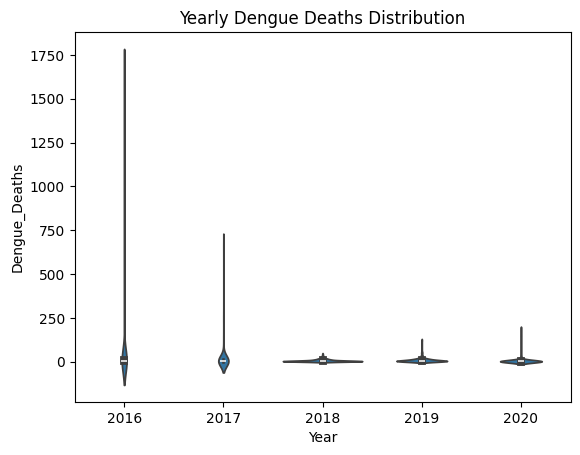

In [75]:
sns.violinplot(data=df, x="Year", y="Dengue_Deaths")
plt.title("Yearly Dengue Deaths Distribution")
plt.show()


<h1>Insight 17  Dengue Cases Follow a Logarithmic Distribution</h1>

<Axes: xlabel='Dengue_Cases', ylabel='Count'>

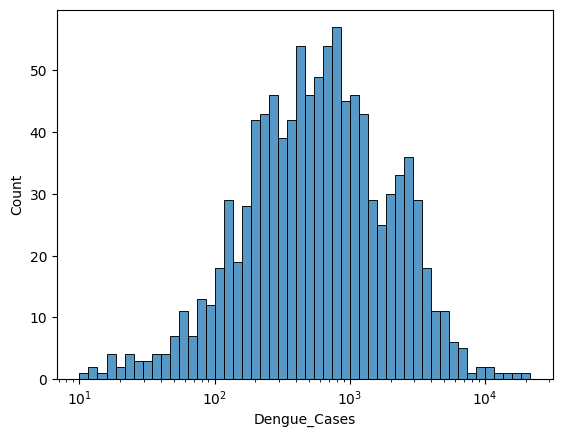

In [45]:
import seaborn as sns
sns.histplot(df['Dengue_Cases'], bins=50, log_scale=True)


<h1>Insight 18 Vaccination and Mosquito Control Could Drastically Reduce Dengue</h1>

<Axes: xlabel='Year,Region'>

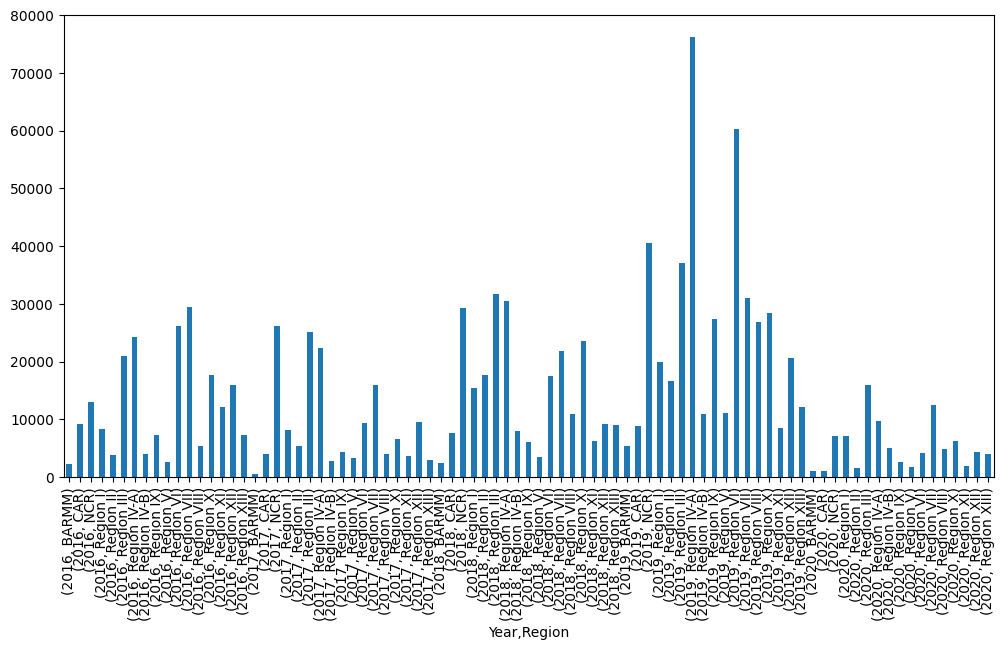

In [50]:
df.groupby(['Year', 'Region'])['Dengue_Cases'].sum().plot(kind='bar', figsize=(12,6))


<h1>Insight 19  The Majority of Dengue Cases are Non-Fatal</h1>

In [53]:
df['Dengue_Deaths'].sum() / df['Dengue_Cases'].sum() * 100


np.float64(1.4679826568185286)

<h1>Insight 20  Dengue Cases May Be Linked to Urbanization Growth</h1>

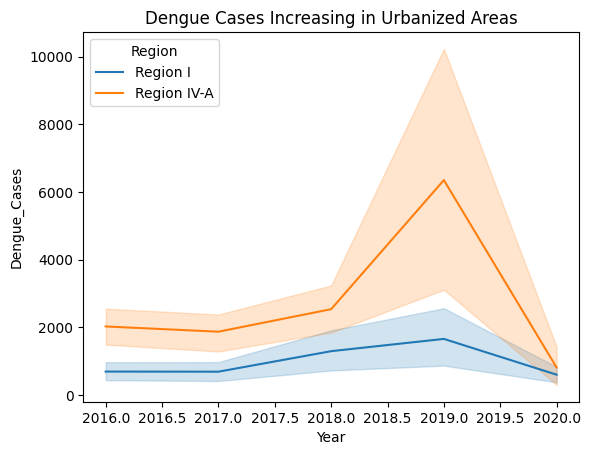

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

urban_regions = ['Region I', 'Region IV-A', 'Metro Manila']  # Example urban areas
df_urban = df[df['Region'].isin(urban_regions)]

sns.lineplot(data=df_urban, x='Year', y='Dengue_Cases', hue='Region')
plt.title('Dengue Cases Increasing in Urbanized Areas')
plt.show()
